In [53]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [54]:
df = pd.read_csv("D:\Work\Development\Machine learning Tasks\drive-download-20240603T074413Z-001\ML Internship Task 5\instagram-reach.csv")

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\sulta\AppData\Local\Temp\ipykernel_11660\3085810335.py:1: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv("D:\Work\Development\Machine learning Tasks\drive-download-20240603T074413Z-001\ML Internship Task 5\instagram-reach.csv")


In [55]:
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [56]:
df.columns

Index(['Date', 'Instagram reach'], dtype='object')

In [57]:
df.describe

<bound method NDFrame.describe of                     Date  Instagram reach
0    2022-04-01T00:00:00             7620
1    2022-04-02T00:00:00            12859
2    2022-04-03T00:00:00            16008
3    2022-04-04T00:00:00            24349
4    2022-04-05T00:00:00            20532
..                   ...              ...
360  2023-03-27T00:00:00            15622
361  2023-03-28T00:00:00            18645
362  2023-03-29T00:00:00            41238
363  2023-03-30T00:00:00            50490
364  2023-03-31T00:00:00            22014

[365 rows x 2 columns]>

In [58]:
df.info

<bound method DataFrame.info of                     Date  Instagram reach
0    2022-04-01T00:00:00             7620
1    2022-04-02T00:00:00            12859
2    2022-04-03T00:00:00            16008
3    2022-04-04T00:00:00            24349
4    2022-04-05T00:00:00            20532
..                   ...              ...
360  2023-03-27T00:00:00            15622
361  2023-03-28T00:00:00            18645
362  2023-03-29T00:00:00            41238
363  2023-03-30T00:00:00            50490
364  2023-03-31T00:00:00            22014

[365 rows x 2 columns]>

In [59]:
df.isnull().sum()

Date               0
Instagram reach    0
dtype: int64

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Instagram reach  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
None


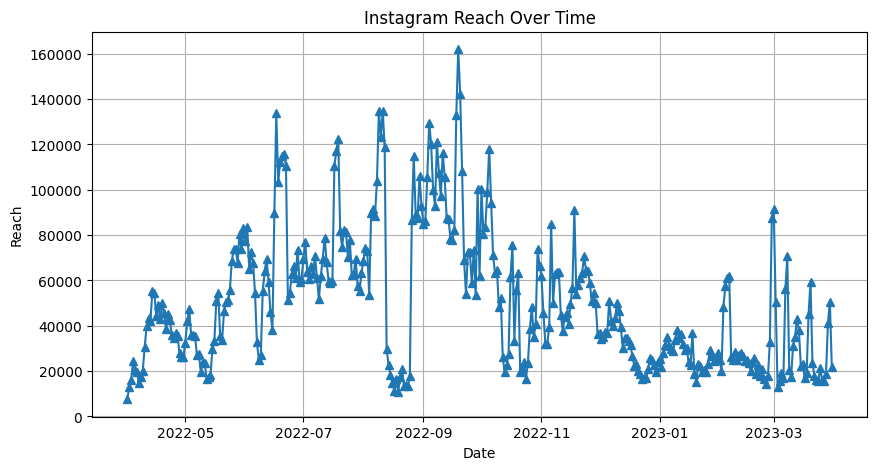

In [61]:
# Plot line chart for Instagram reach over time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Instagram reach'], marker='^')
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Reach')
plt.grid(True)
plt.show()


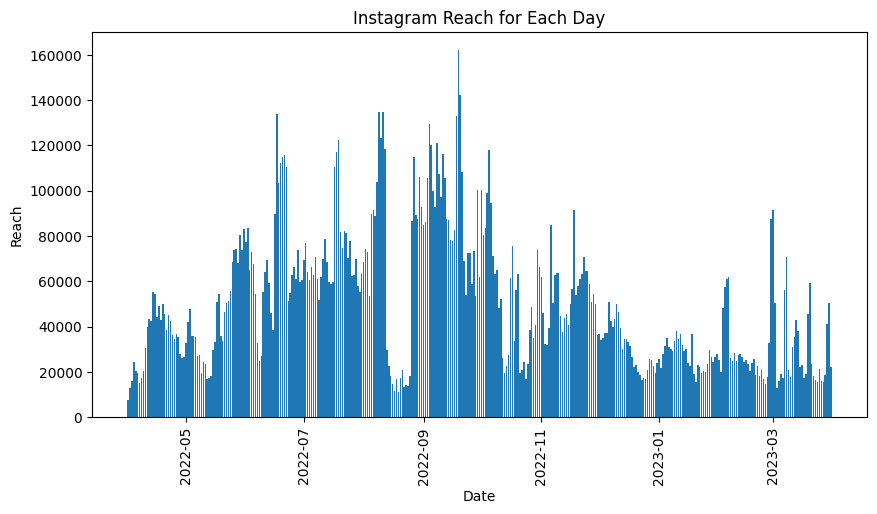

In [62]:
# Plot bar chart for Instagram reach each day
plt.figure(figsize=(10, 5))
plt.bar(df['Date'], df['Instagram reach'])
plt.title('Instagram Reach for Each Day')
plt.xlabel('Date')
plt.ylabel('Reach')
plt.xticks(rotation=90)
plt.show()


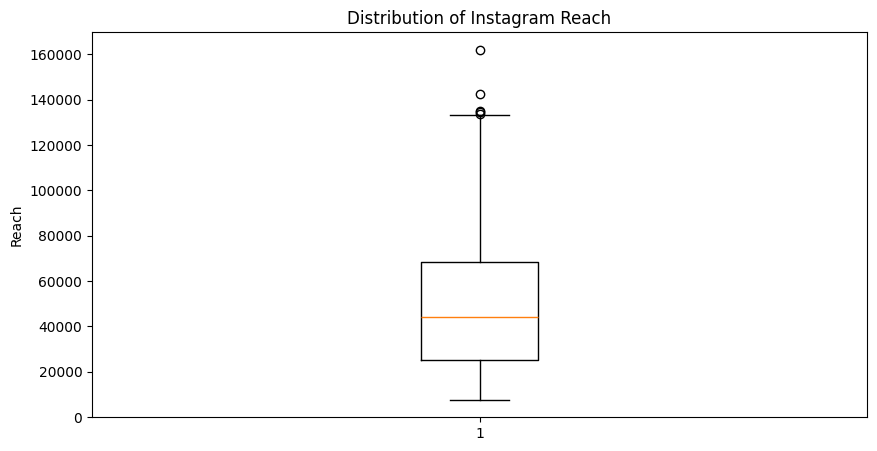

In [63]:
# Plot box plot for Instagram reach
plt.figure(figsize=(10, 5))
plt.boxplot(df['Instagram reach'])
plt.title('Distribution of Instagram Reach')
plt.ylabel('Reach')
plt.show()


In [64]:
# Create a day of the week column
df['Day'] = df['Date'].dt.day_name()

# Group by day and calculate statistics
day_stats = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std'])
print(day_stats)


                   mean   median           std
Day                                           
Friday     46666.849057  35574.0  29856.943036
Monday     52621.692308  46853.0  32296.071347
Saturday   47374.750000  40012.0  27667.043634
Sunday     53114.173077  47797.0  30906.162384
Thursday   48570.923077  39150.0  28623.220625
Tuesday    54030.557692  48786.0  32503.726482
Wednesday  51017.269231  42320.5  29047.869685


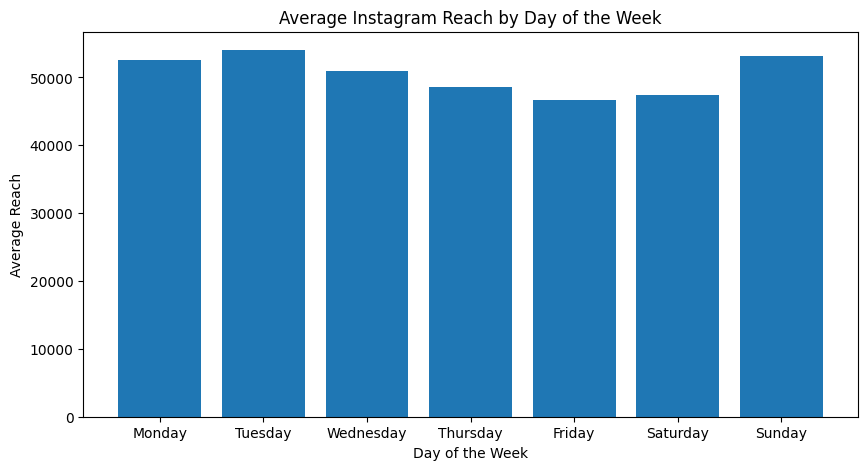

In [65]:
# Plot bar chart for average reach per day of the week
plt.figure(figsize=(10, 5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats = day_stats.reindex(day_order)
plt.bar(day_stats.index, day_stats['mean'])
plt.title('Average Instagram Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Reach')
plt.show()


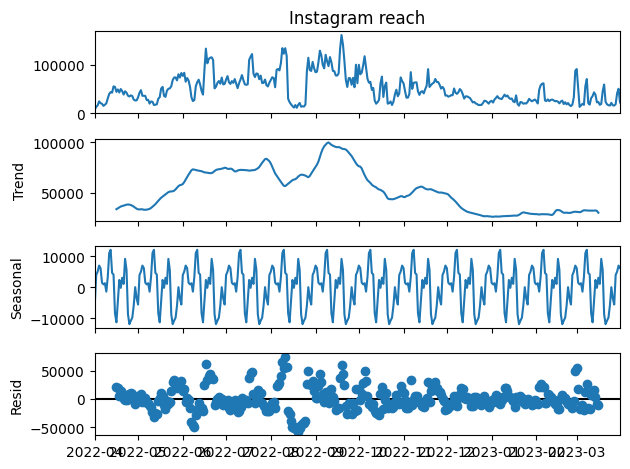

In [66]:
# Decompose the time series
df.set_index('Date', inplace=True)
result = seasonal_decompose(df['Instagram reach'], model='additive', period=30)

# Plot the decomposed components
result.plot()
plt.show()


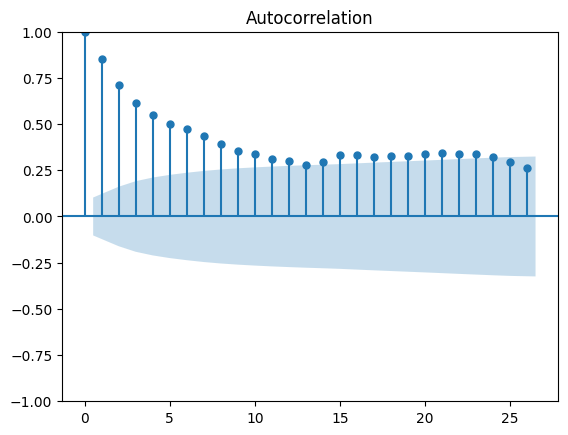

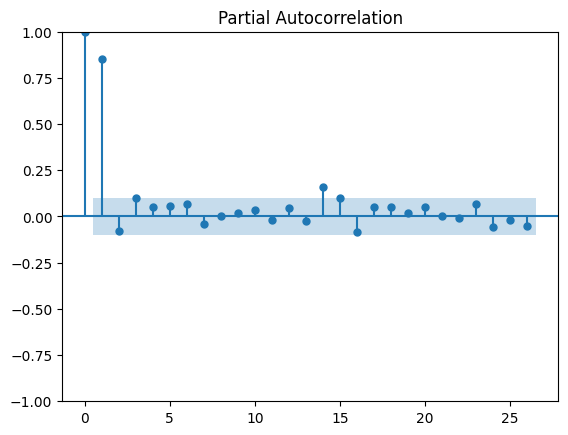

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot to find p
plot_acf(df['Instagram reach'])
plt.show()

# Partial autocorrelation plot to find q
plot_pacf(df['Instagram reach'])
plt.show()

# Value of d is given as 1

c:\Users\sulta\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\sulta\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


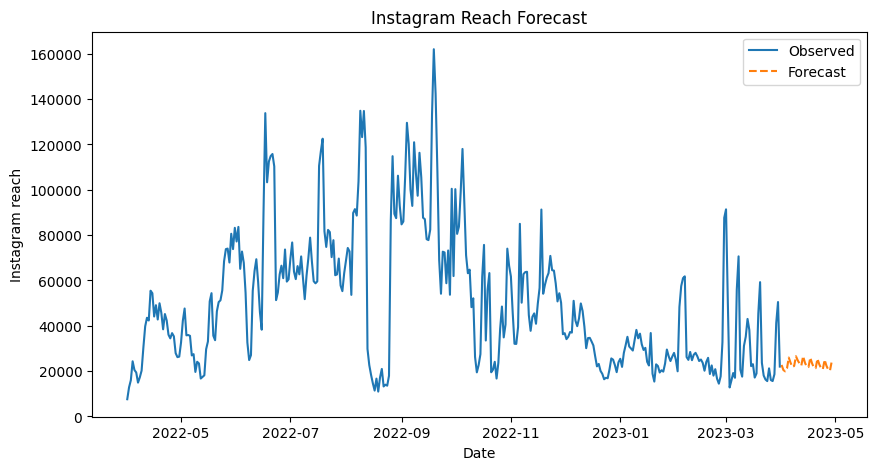

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
model = SARIMAX(df['Instagram reach'], order=(2, 1, 3), seasonal_order=(2, 1, 3, 4))

# Fit the model
sarima_model = model.fit()

# Forecast
forecast = sarima_model.get_forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1], periods=30, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Instagram reach'], label='Observed')
plt.plot(forecast_series, label='Forecast', linestyle='--')
plt.title('Instagram Reach Forecast')
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.legend()
plt.show()
